In [1]:
import pandas as pd

In [2]:
train = pd.read_csv("train.csv")
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
test = pd.read_csv("test.csv")
test.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [4]:
submission = pd.read_csv("submission.csv")
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


array([[<AxesSubplot:title={'center':'season'}>,
        <AxesSubplot:title={'center':'holiday'}>,
        <AxesSubplot:title={'center':'workingday'}>],
       [<AxesSubplot:title={'center':'weather'}>,
        <AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'atemp'}>],
       [<AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'windspeed'}>,
        <AxesSubplot:title={'center':'casual'}>],
       [<AxesSubplot:title={'center':'registered'}>,
        <AxesSubplot:title={'center':'count'}>, <AxesSubplot:>]],
      dtype=object)

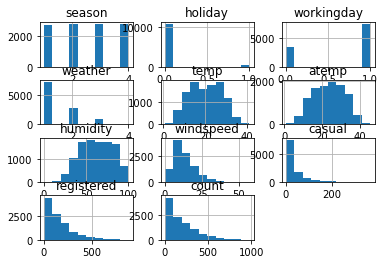

In [10]:
train.hist()


In [11]:
train["season"] = train.season.astype('category')
train["weather"] = train.weather.astype('category')
test["season"] = test.season.astype('category')
test["weather"] = test.weather.astype('category')

In [13]:
train.describe()

,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,0.028569,0.680875,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,0.166599,0.466159,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.000000,0.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,0.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,0.000000,1.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,1.000000,1.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [14]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

array([[<AxesSubplot:title={'center':'holiday'}>,
        <AxesSubplot:title={'center':'workingday'}>,
        <AxesSubplot:title={'center':'temp'}>],
       [<AxesSubplot:title={'center':'atemp'}>,
        <AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'windspeed'}>],
       [<AxesSubplot:title={'center':'casual'}>,
        <AxesSubplot:title={'center':'registered'}>,
        <AxesSubplot:title={'center':'count'}>]], dtype=object)

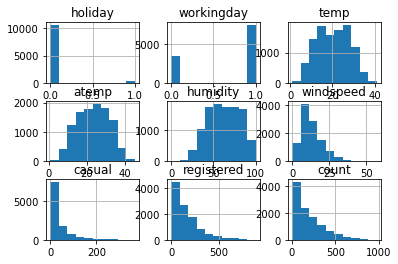

In [15]:
train.hist()

In [17]:
train.to_csv("train.csv", index=False)
submission.to_csv("submission.csv", index=False)
test.to_csv("test.csv", index=False)

In [23]:
from sklearn.model_selection import train_test_split

In [28]:
train.corr()

,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count
holiday,1.000000,-0.250491,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.250491,1.000000,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
temp,0.000295,0.029966,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,-0.005215,0.024660,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.001929,-0.010880,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,0.008409,0.013373,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.043799,-0.319111,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,-0.020956,0.119460,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948
count,-0.005393,0.011594,0.394454,0.389784,-0.317371,0.101369,0.690414,0.970948,1.000000


In [29]:
test.corr()

,holiday,workingday,temp,atemp,humidity,windspeed
holiday,1.000000,-0.255820,-0.071852,-0.072373,-0.031611,-0.003240
workingday,-0.255820,1.000000,0.096519,0.103202,0.059599,-0.053690
temp,-0.071852,0.096519,1.000000,0.991936,-0.081734,-0.030990
atemp,-0.072373,0.103202,0.991936,1.000000,-0.068666,-0.069655
humidity,-0.031611,0.059599,-0.081734,-0.068666,1.000000,-0.242708
windspeed,-0.003240,-0.053690,-0.030990,-0.069655,-0.242708,1.000000
